In [49]:
import geopandas as gpd
import pandas as pd
import re
import qgrid

%matplotlib inline

## Get the map of France from data.gouv.fr

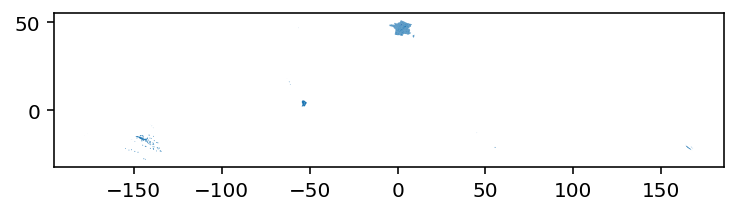

In [44]:
# https://www.data.gouv.fr/fr/datasets/carte-des-circonscriptions-legislatives-2012-et-2017/
# Source: https://www.data.gouv.fr/fr/datasets/r/efa8c2e6-b8f7-4594-ad01-10b46b06b56a

url = 'https://www.data.gouv.fr/fr/datasets/r/efa8c2e6-b8f7-4594-ad01-10b46b06b56a'

france_map = gpd.read_file(url)
france_map.plot()

The map contains information about metropolitan France and overseas territories. We need to do a filter on metropolitan territories to have something plotable.

In [25]:
qgrid_widget = qgrid.show_grid(france_map, show_toolbar=True, grid_options={'maxVisibleRows':5})
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

We select only departments not starting with "Z"

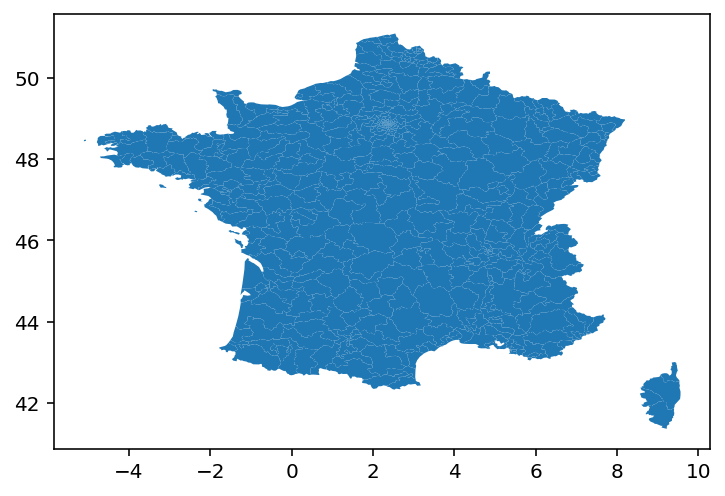

In [253]:
france_metro_map = france_map[[not i.startswith('Z') for i in france_map.code_dpt]]
france_metro_map.plot()

## Get the results of European election in France from data.gouv.fr

In [268]:
# Source https://www.data.gouv.fr/fr/datasets/elections-europeennes-2019-resultats/#_
url = 'https://www.data.gouv.fr/fr/datasets/r/09e237d8-e14e-4a84-9c7a-d9c9be9a53bf'
url = 'https://www.data.gouv.fr/fr/datasets/r/75e0e363-3390-4545-865a-d37c51048764'
#eu_elec = pd.read_csv(url, sep=';', encoding='latin_1')
eu_elec = pd.read_excel(url)


In [269]:
qgrid_widget_2 = qgrid.show_grid(eu_elec, show_toolbar=True, grid_options={'maxVisibleRows':5,
                                                                           'forceFitColumns': False,
                                                           'defaultColumnWidth': 100})
qgrid_widget_2

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

## Filter Data

Let's remove note metropolitan departements:

In [270]:
eu_elec = eu_elec[[not i.startswith('Z') for i in eu_elec['Code du département']]]

There is too much column, we will remove unecessary column:

In [271]:
eu_elec.columns[18:25]

Index(['N°Liste', 'Libellé Abrégé Liste', 'Libellé Etendu Liste',
       'Nom Tête de Liste', 'Voix', '% Voix/Ins', '% Voix/Exp'],
      dtype='object')

In [272]:
start_list = 18
len_list = 7
end_list = len(eu_elec.columns)

list_name = eu_elec.loc[0]

In [273]:
list_number = eu_elec.iloc[0, range(start_list, end_list, len_list)]
list_short_name = eu_elec.iloc[0, range(start_list+1, end_list, len_list)]
list_name = eu_elec.iloc[0, range(start_list+2, end_list, len_list)]
list_head = eu_elec.iloc[0, range(start_list+3, end_list, len_list)]

Change the column name of number votes by the short name of the liste:

In [274]:
old_col_name = eu_elec.columns.to_list()

for i, j in enumerate(range(start_list+4, end_list, len_list)):
    old_col_name[j] = list_short_name[i] 

eu_elec.columns = old_col_name

In [275]:
col_to_drop = eu_elec.columns[ [i.startswith('Unnamed:') for i in eu_elec.columns ]]
col_to_drop = list(col_to_drop) + list(eu_elec.columns[[18, 19, 20, 21, 23, 24]])
#[18, 19, 20, 21, 23, 24] + 

In [276]:
eu_elec = eu_elec.drop(columns=col_to_drop)

## Get list with score more than 5%

In [277]:
exprime_tot = eu_elec['Exprimés'].sum()

In [278]:
col_list = eu_elec.columns[18:]

In [279]:
high_score = list(col_list[eu_elec.iloc[:,18:].sum()/exprime_tot*100 > 5])

In [280]:
high_score

['LA FRANCE INSOUMISE',
 'RENAISSANCE',
 "ENVIE D'EUROPE",
 'PRENEZ LE POUVOIR',
 'UNION DROITE-CENTRE',
 'EUROPE ÉCOLOGIE']

In [284]:
eu_elec_dpt = eu_elec.groupby(['Code du département']).sum()
eu_elec_dpt

,Code du canton,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,...,RÉVOLUTIONNAIRE,ESPERANTO,ÉVOLUTION CITOYENNE,ALLIANCE JAUNE,UNION DROITE-CENTRE,EUROPE ÉCOLOGIE,PARTI ANIMALISTE,LES OUBLIES DE L'EUROPE,UDLEF,EUROPE AU SERVICE PEUPLES
Code du département,,,,,,,,,,,,,,,,,,,,,
01,276,417835,209630,1160.24,208205,1139.76,4630,25.35,51.04,4459,...,1,152,7,1004,21215,27429,4068,458,8,273
02,231,371723,176251,994.10,195472,1105.90,4970,28.16,53.12,4718,...,6,151,10,1238,13344,14538,4797,448,10,49
03,190,248389,113300,867.97,135089,1032.03,4327,32.86,60.39,4813,...,0,108,1,851,14021,11403,2992,375,2,16
04,120,126239,56609,671.29,69630,828.71,1614,19.40,34.67,1701,...,0,81,16,461,4314,8750,1468,185,0,2
05,120,109697,49410,676.07,60287,823.93,1575,21.47,38.74,1211,...,0,66,8,308,4415,9239,1191,192,1,9
06,378,755807,379115,1358.46,376692,1341.54,6249,22.04,44.21,6244,...,49,250,40,1642,41638,43249,9943,423,69,767
07,153,249119,111338,760.74,137781,939.26,3717,25.50,46.04,3383,...,1,93,12,754,13525,18125,2414,373,3,6
08,190,191612,94083,935.99,97529,964.01,2252,22.24,43.23,2835,...,0,53,8,574,7528,7789,2667,242,6,49
09,91,117517,50774,560.05,66743,739.95,1930,21.42,37.59,1830,...,2,71,3,370,3276,7788,1301,243,0,2


In [302]:
main_list_num = len(high_score)
result_list = [[] for _ in range(main_list_num)]


for index, row in france_metro_map.iterrows():
    dpt = row.code_dpt
    for i in range(main_list_num):
        result_list[i].append(100*eu_elec_dpt.loc[dpt, high_score[i]]/eu_elec_dpt.loc[dpt, 'Exprimés'])

for i in range(main_list_num):
    france_metro_map[high_score[i]] = result_list[i]

/Users/smurail/miniconda3/envs/jupyter_course/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


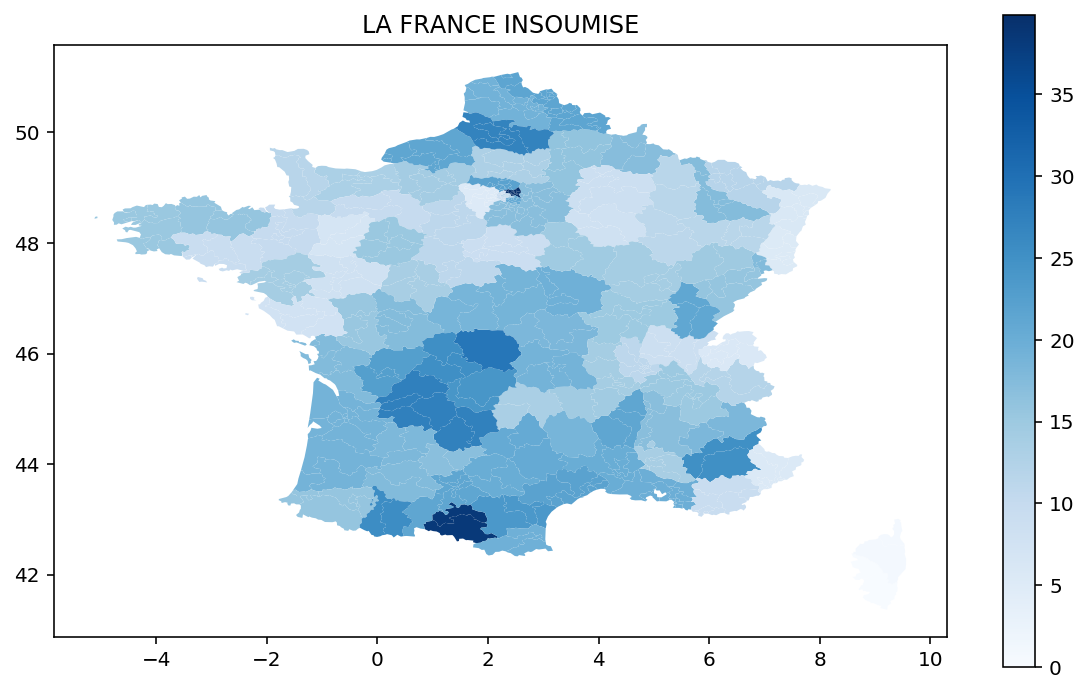

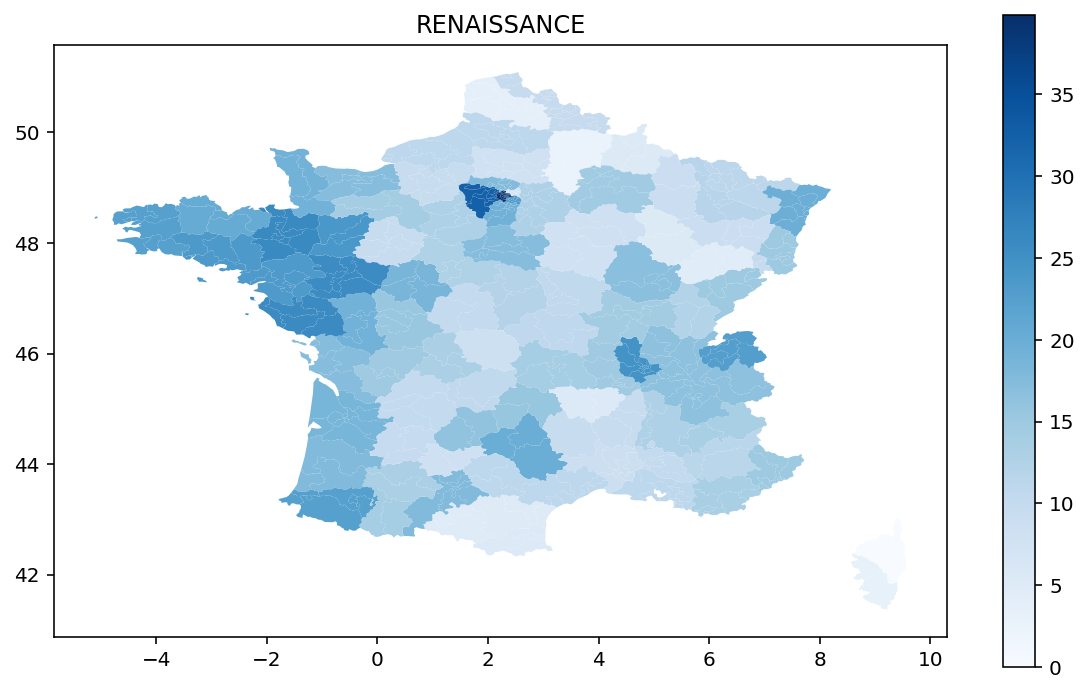

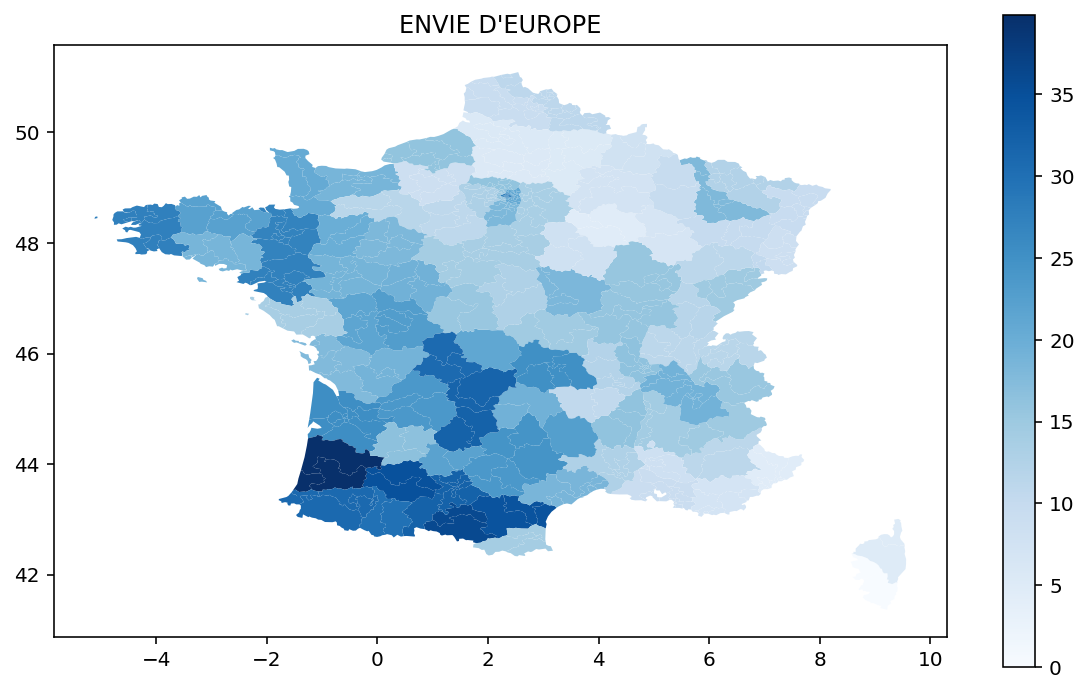

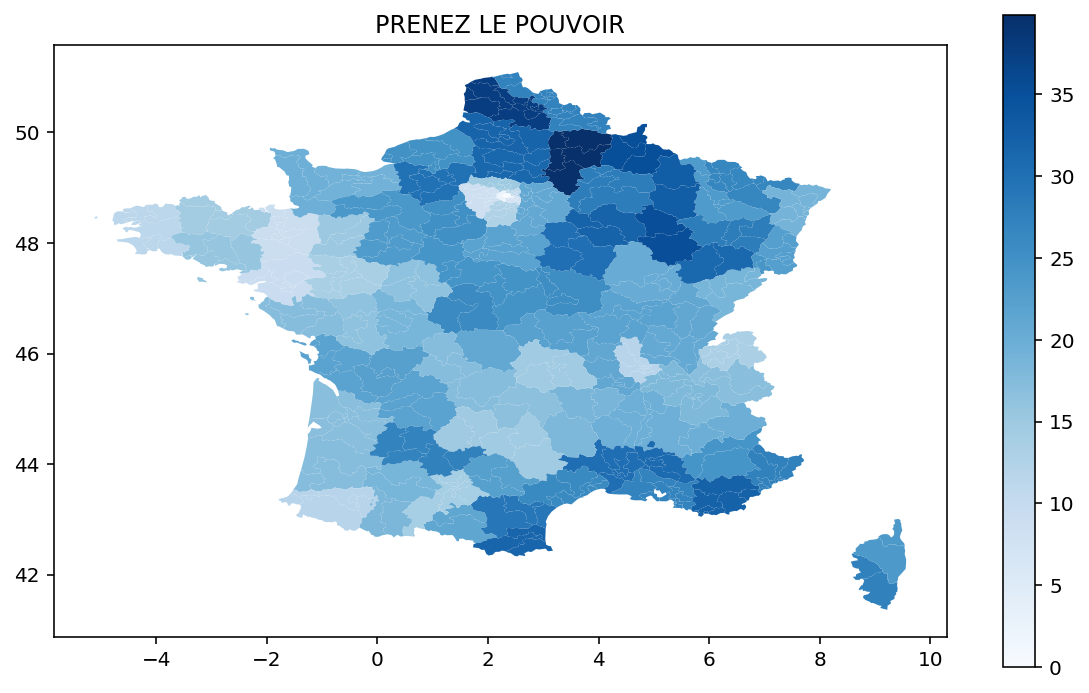

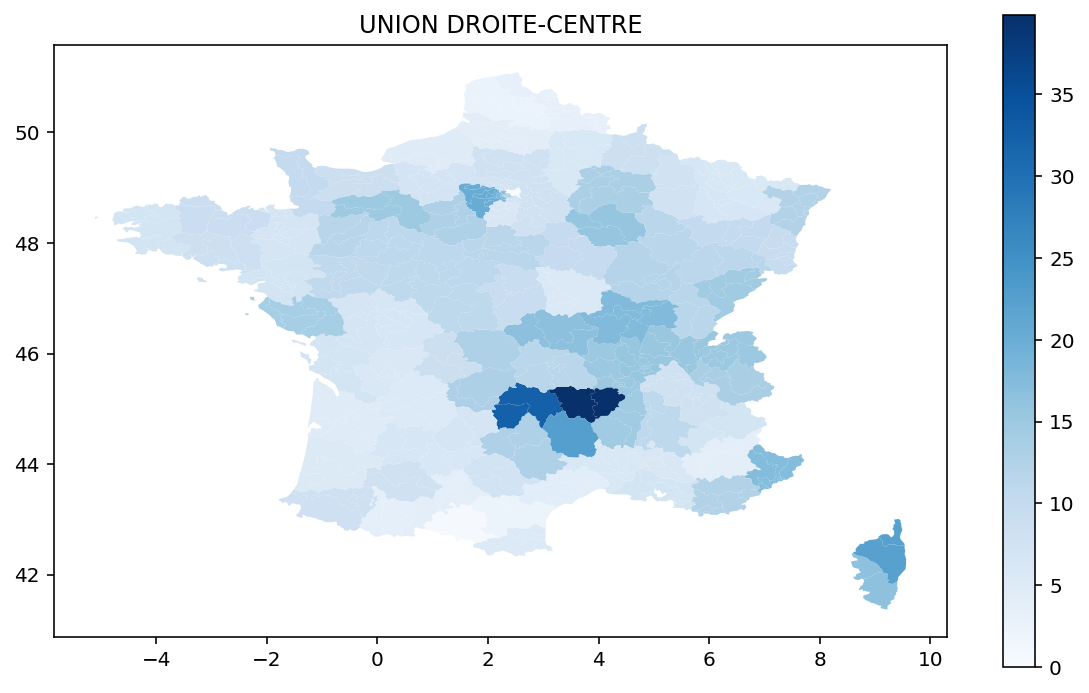

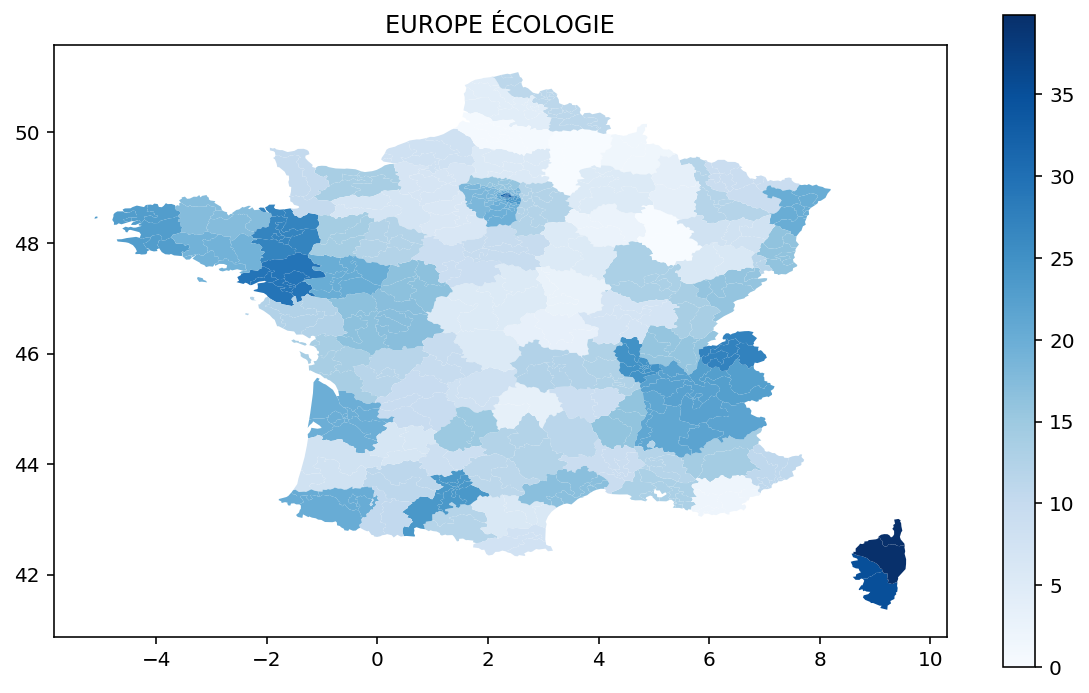

In [321]:
import matplotlib.pyplot as plt

flat_result = [j for sub in result_list for j in sub]

min_perc = 0
max_perc = max(flat_result)

for i, liste in enumerate(high_score):
    fig, ax = plt.subplots(1, figsize=(10, 6))
    france_metro_map.plot(column=liste, ax=ax, cmap='Blues')
    plt.title(liste)
    sm = plt.cm.ScalarMappable(cmap='Blues',
                               norm=plt.Normalize(vmin=min_perc, vmax=max_perc))

    # empty array for the data range

    sm._A = []

    # add the colorbar to the figure

    cbar = fig.colorbar(sm)
    #plt.colorbar()